In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam, optics, beamline2d

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(20):
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=5e-6, z=800.344434)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800.02 + 1e-3)
downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803)


devices = [mr1l0,mr2l0,test_mirror, IP,downstream_YAG, upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 359.90462293506476 microns
FWHM in y: 359.90462293506476 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
x is focused
y is focused


mr1l0
drift1
remaining distance: 7286000.00 microns
mr2l0
drift2
remaining distance: 42714000.00 microns
x becomes unfocused
y becomes unfocused
remaining distance: 4403314.74 microns
test
drift3
remaining distance: 10000000.00 microns
crl0
focal length: 6.62
drift4
remaining distance: 1000.00 microns
crl1
focal length: 6.62
drift5
remaining distance: 1000.00 microns
crl2
focal length: 6.62
drift6
remaining distance: 1000.00 microns
crl3
focal length: 6.62
drift7
remaining distance: 1000.00 microns
crl4
focal length: 6.62
drift8
remaining distance: 1000.00 microns
crl5
focal length: 6.62
drift9
remaining distance: 1000.00 microns
crl6
focal length: 6.62
drift10
remaining distance: 1000.00 microns
crl7
focal length: 6.62
drift11
remaining distance: 1000.00 microns
crl8
focal length: 6.62
drift12
remaining distance: 1000.00 microns
crl9
focal length: 6.62
drift13
remaining distance: 1000.00 microns
crl10
focal length: 6.62
drift14
remaining distance: 1000.00 microns
crl11
focal length: 6

<IPython.core.display.Javascript object>


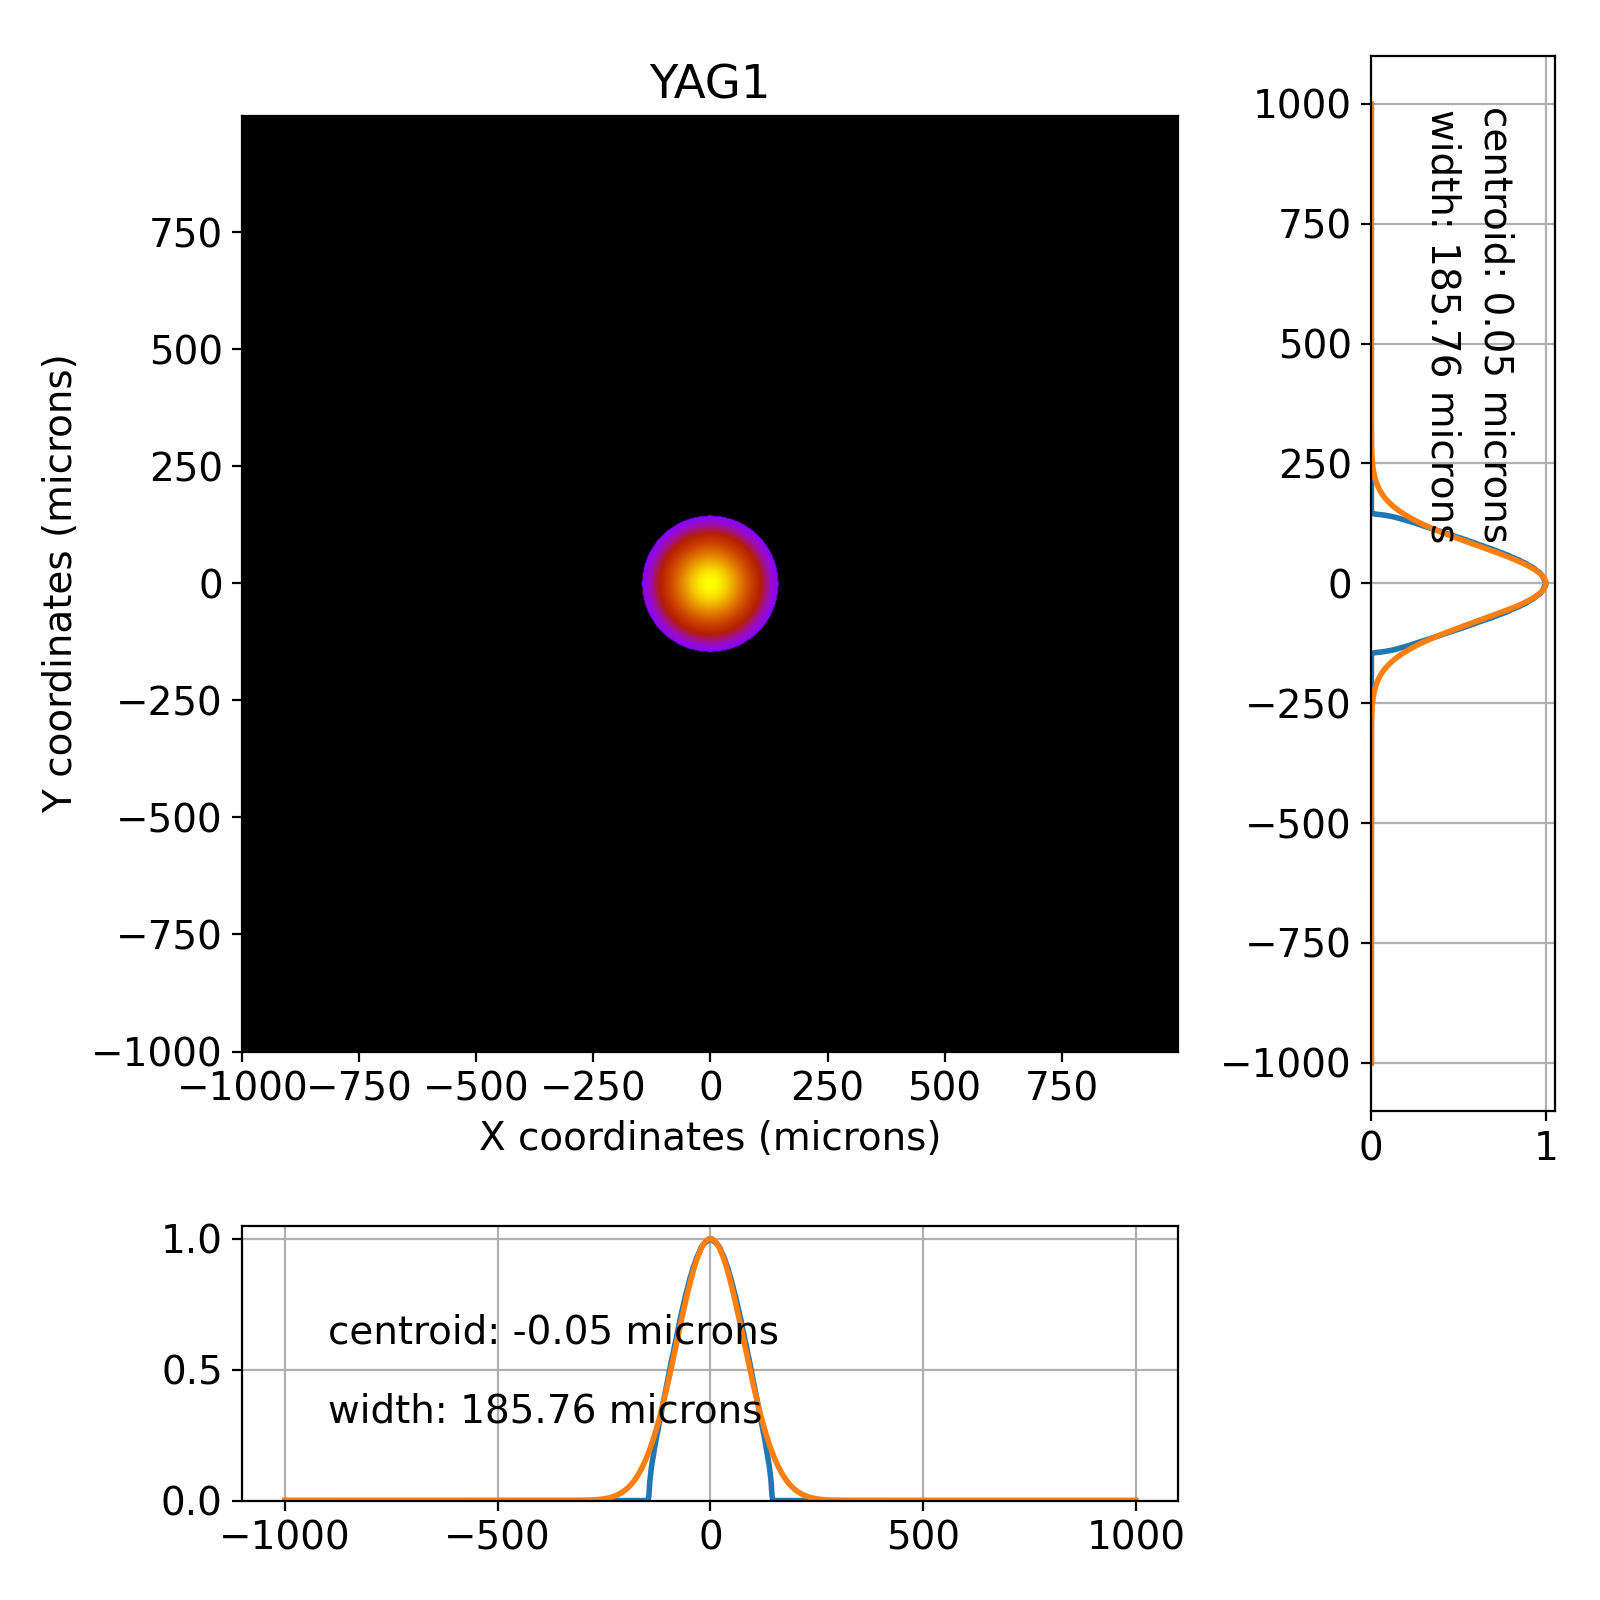

<IPython.core.display.Javascript object>


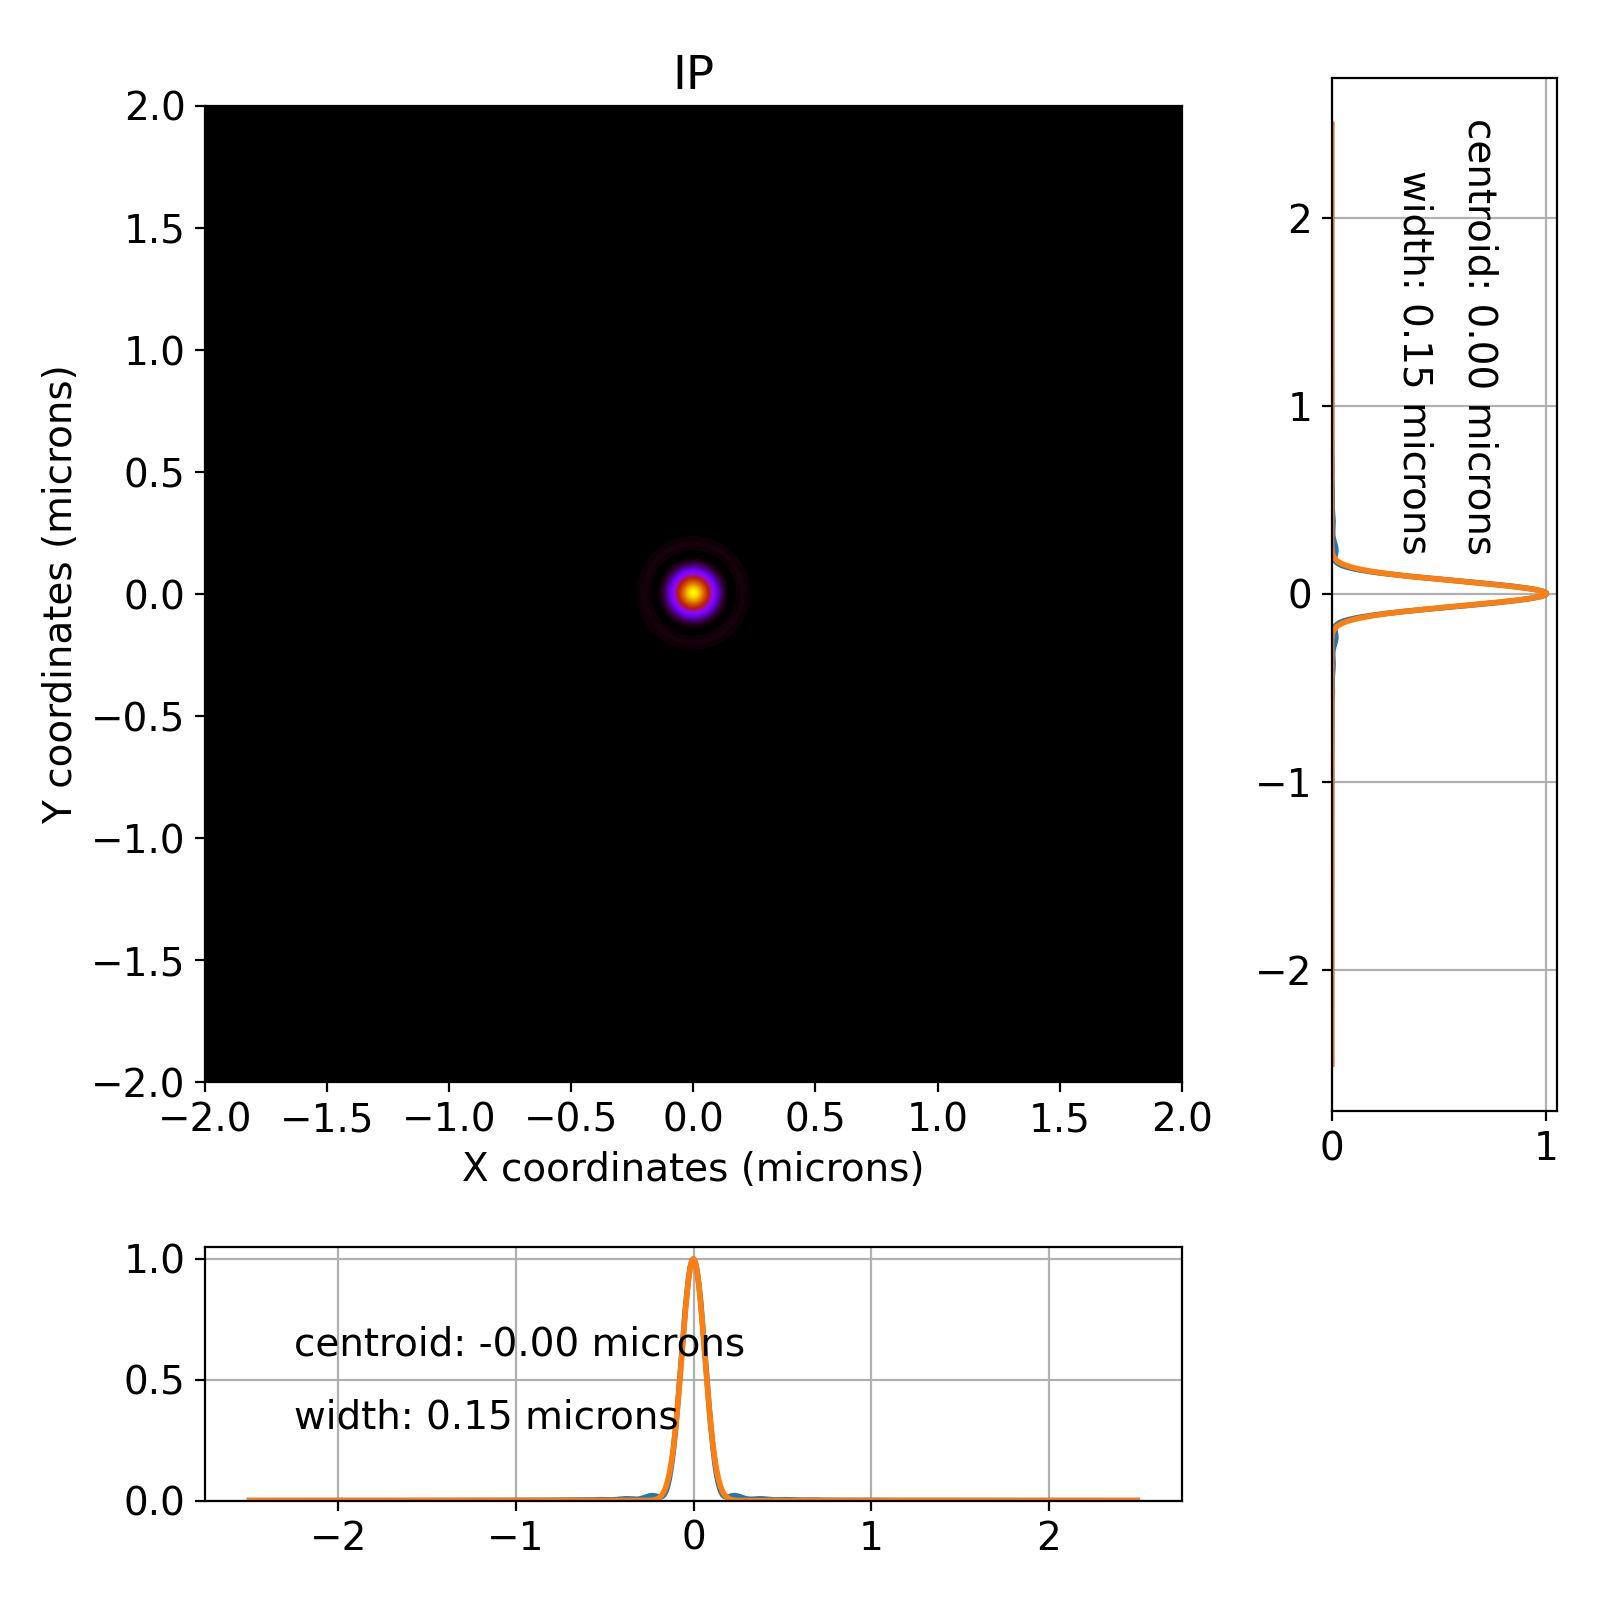

<IPython.core.display.Javascript object>


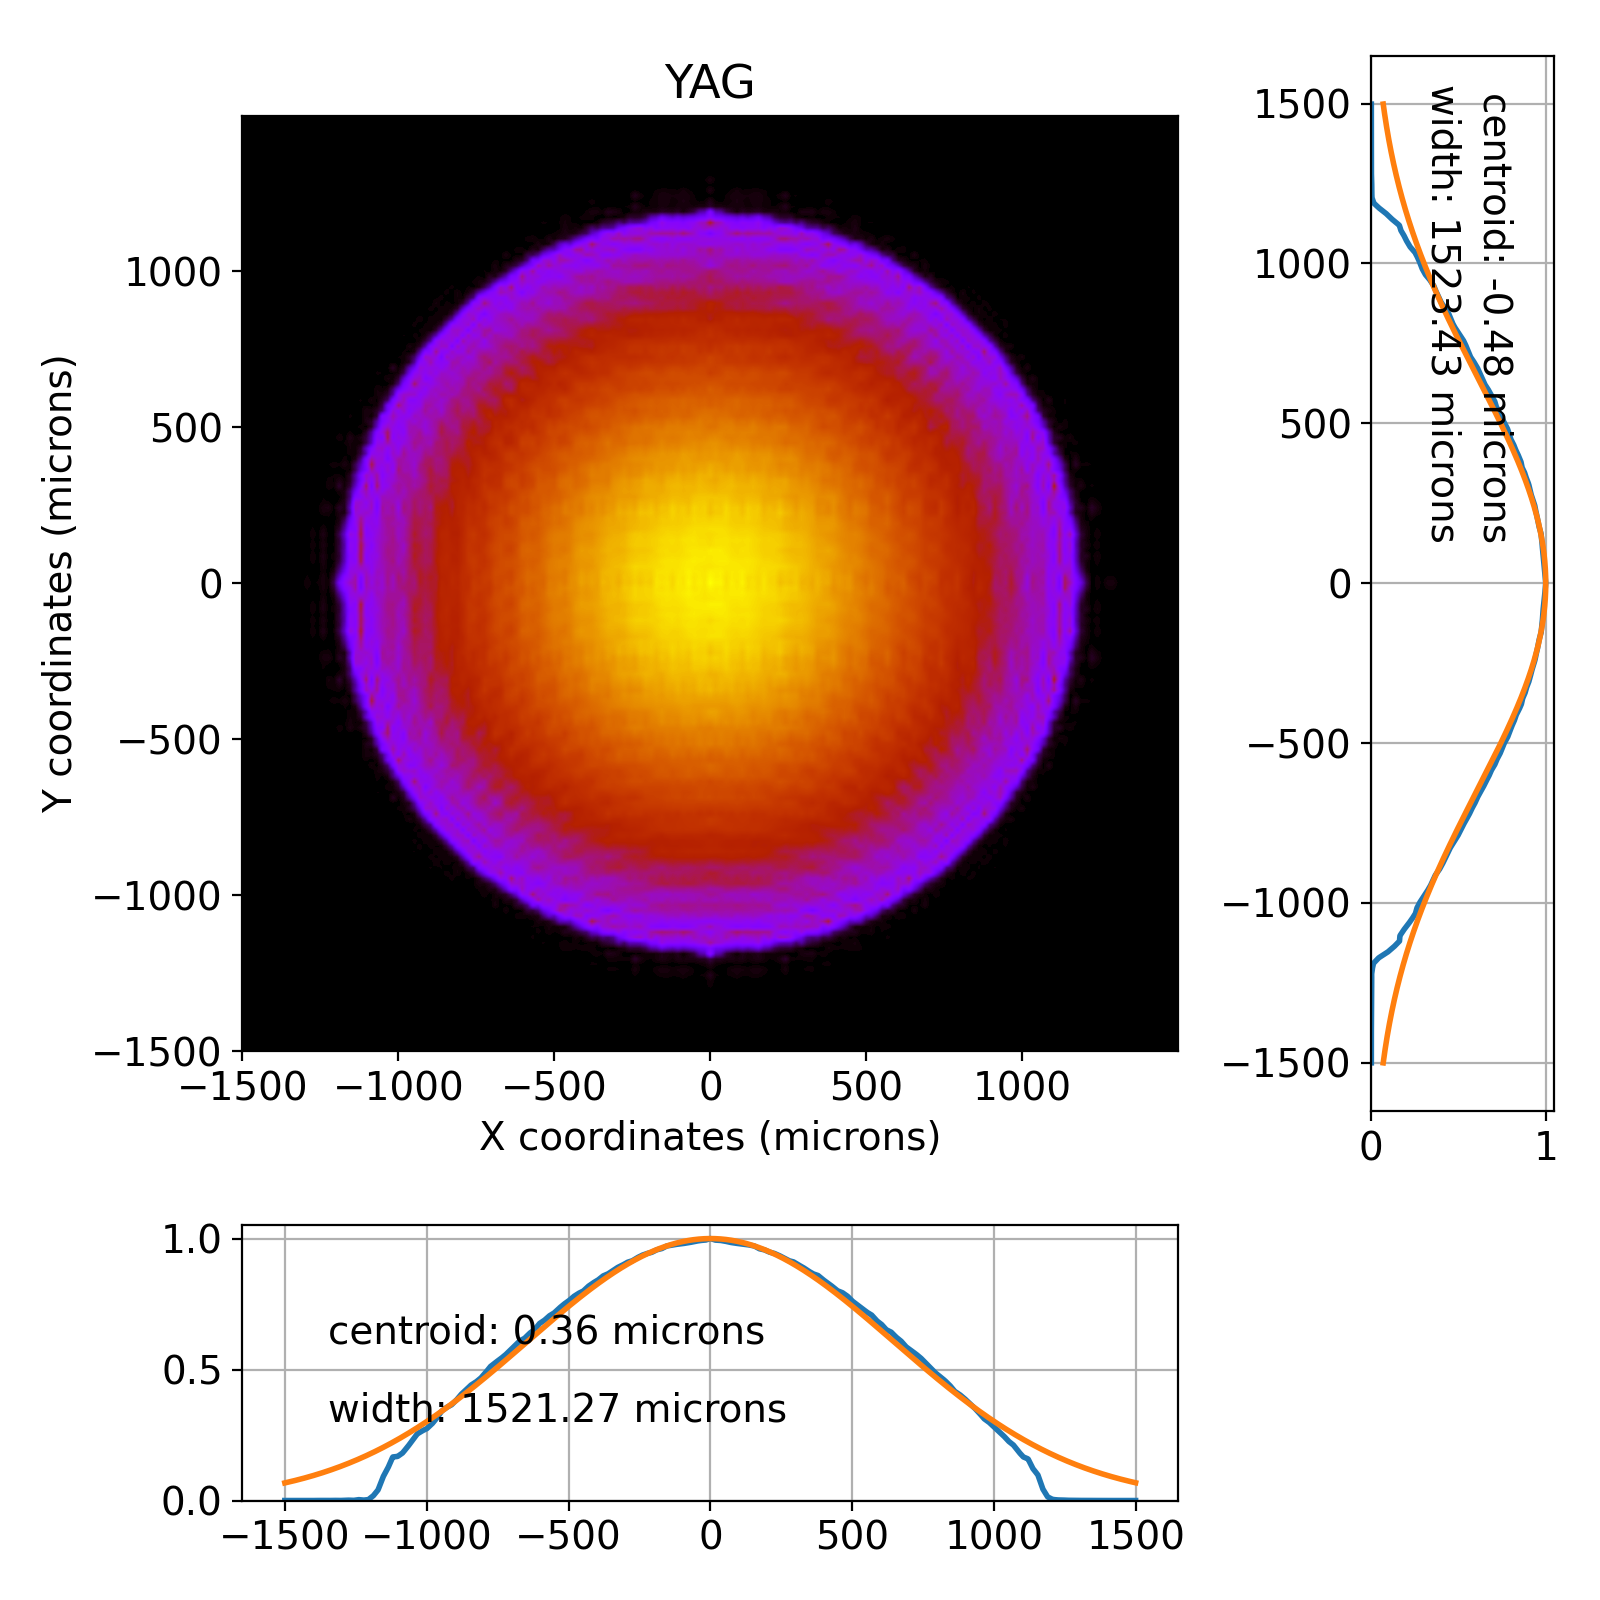

In [4]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.YAG.view_beam()

In [16]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=10, time_window=100)

In [17]:
pulse_test.energy

array([9499.53501723, 9499.57930131, 9499.62358538, 9499.66786945,
       9499.71215353, 9499.7564376 , 9499.80072167, 9499.84500574,
       9499.88928982, 9499.93357389, 9499.97785796, 9500.02214204,
       9500.06642611, 9500.11071018, 9500.15499426, 9500.19927833,
       9500.2435624 , 9500.28784647, 9500.33213055, 9500.37641462,
       9500.42069869, 9500.46498277])

In [18]:
.41*2000

820.0